In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import pickle

In [20]:
# Load the dataset
data = pd.read_csv(r'E:\3rd Year 1st semi\Fdm\FDM_Project\Strock Prediction\Dataset\healthcare-dataset-stroke-data.csv')


In [21]:

# Overview of the dataset
print("No of columns in the data:", len(data.columns))
print("No of rows in the data:", len(data))
print("\nFirst 5 Rows of the Data:")
data.head()

No of columns in the data: 12
No of rows in the data: 5110

First 5 Rows of the Data:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [22]:
# Dataset Overview
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [23]:
# Basic statistics of numerical features
print("\nStatistical Summary:")
data.describe()


Statistical Summary:


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [24]:
# Check for missing values
missing_data = data.isnull().sum()
print("\nMissing Data in Each Column:")
print(missing_data)


Missing Data in Each Column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [25]:
# Impute missing numerical values in 'bmi' with the median
imputer = SimpleImputer(strategy='median')
data['bmi'] = imputer.fit_transform(data[['bmi']])

In [26]:
# Check if all missing values are handled
print("\nMissing Data After Imputation:")
print(data.isnull().sum())


Missing Data After Imputation:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [27]:
# Remove 'id' column as it's not useful for prediction
data.drop('id', axis=1, inplace=True)

In [28]:
# Label encoding for categorical features
label_encoders = {}
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])


In [29]:
# Check for duplicates and remove them
print("\nNumber of Duplicate Rows:", data.duplicated().sum())
data.drop_duplicates(inplace=True)


Number of Duplicate Rows: 0


In [30]:
# Descriptive statistics of the dataset after preprocessing
print("\nStatistical Summary After Preprocessing:")
data.describe().T


Statistical Summary After Preprocessing:


,count,mean,std,min,25%,50%,75%,max
gender,5110.0,0.414286,0.493044,0.00,0.000,0.000,1.00,2.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
ever_married,5110.0,0.656164,0.475034,0.00,0.000,1.000,1.00,1.00
work_type,5110.0,2.167710,1.090293,0.00,2.000,2.000,3.00,4.00
Residence_type,5110.0,0.508023,0.499985,0.00,0.000,1.000,1.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.862035,7.699562,10.30,23.800,28.100,32.80,97.60
smoking_status,5110.0,1.376908,1.071534,0.00,0.000,2.000,2.00,3.00


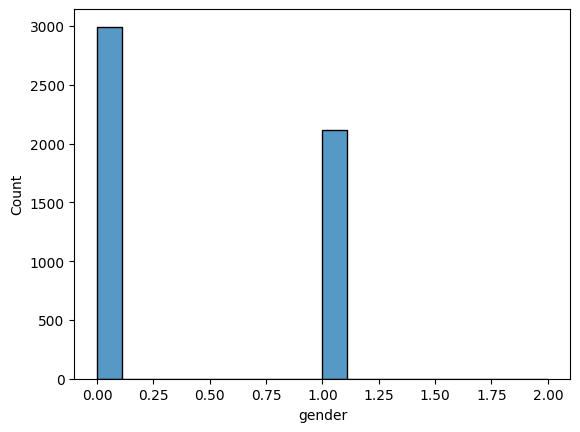

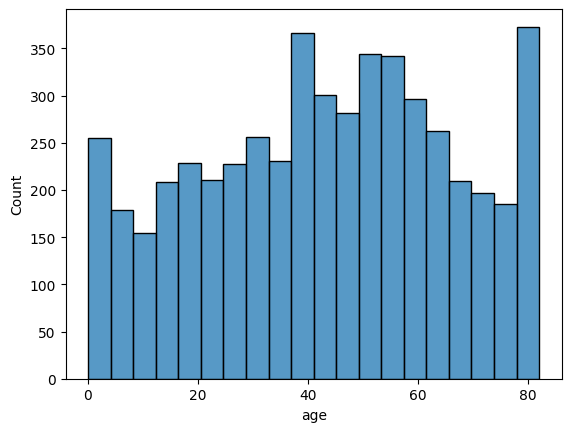

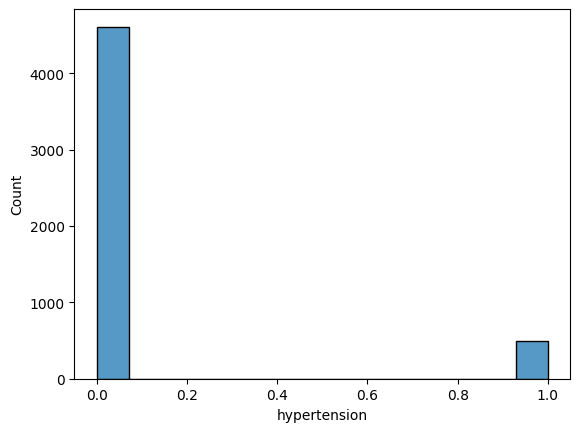

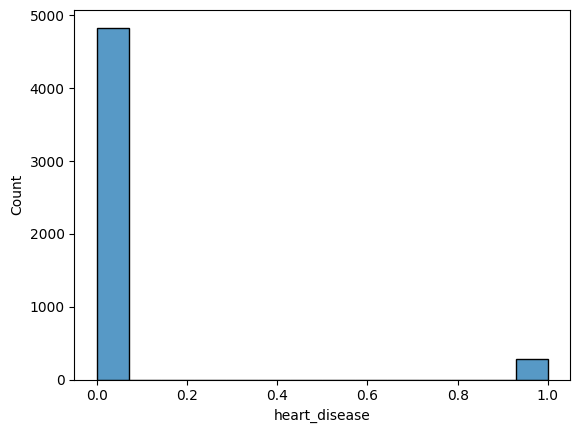

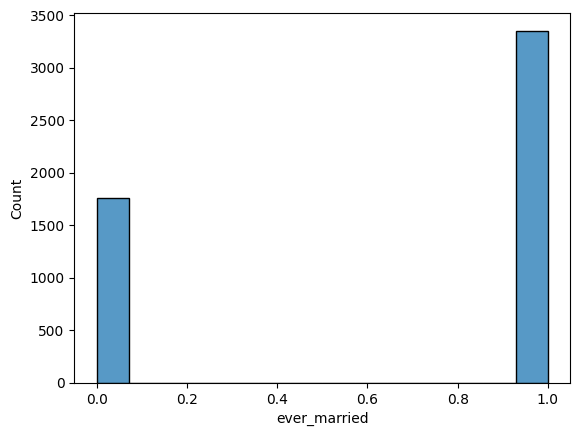

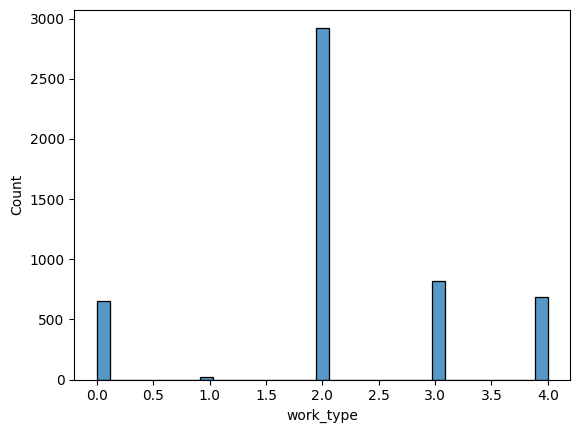

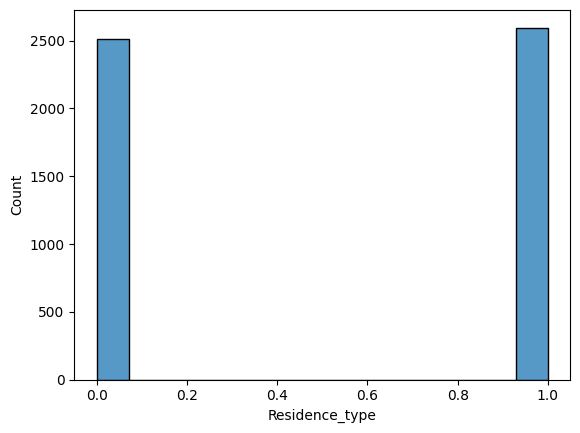

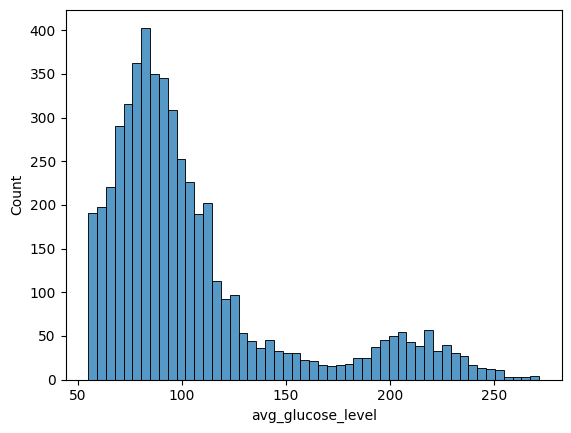

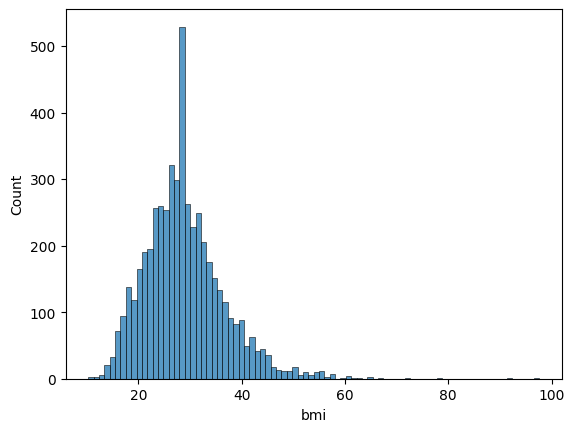

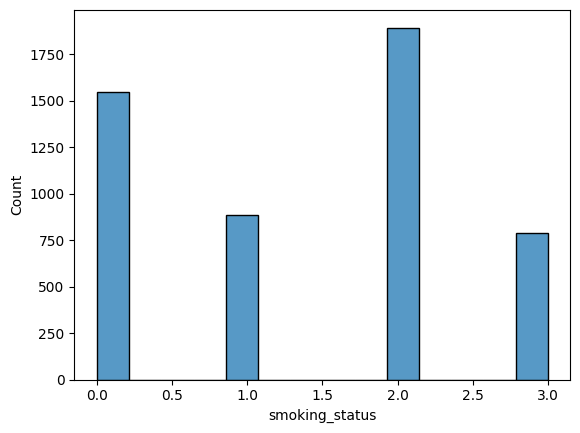

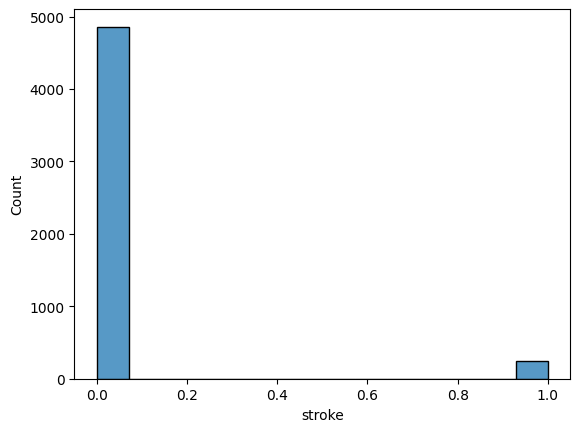

In [31]:
# Visualize the distribution of numerical features
for i in data.select_dtypes(include="number").columns:
    sns.histplot(data=data, x=i)
    plt.show()

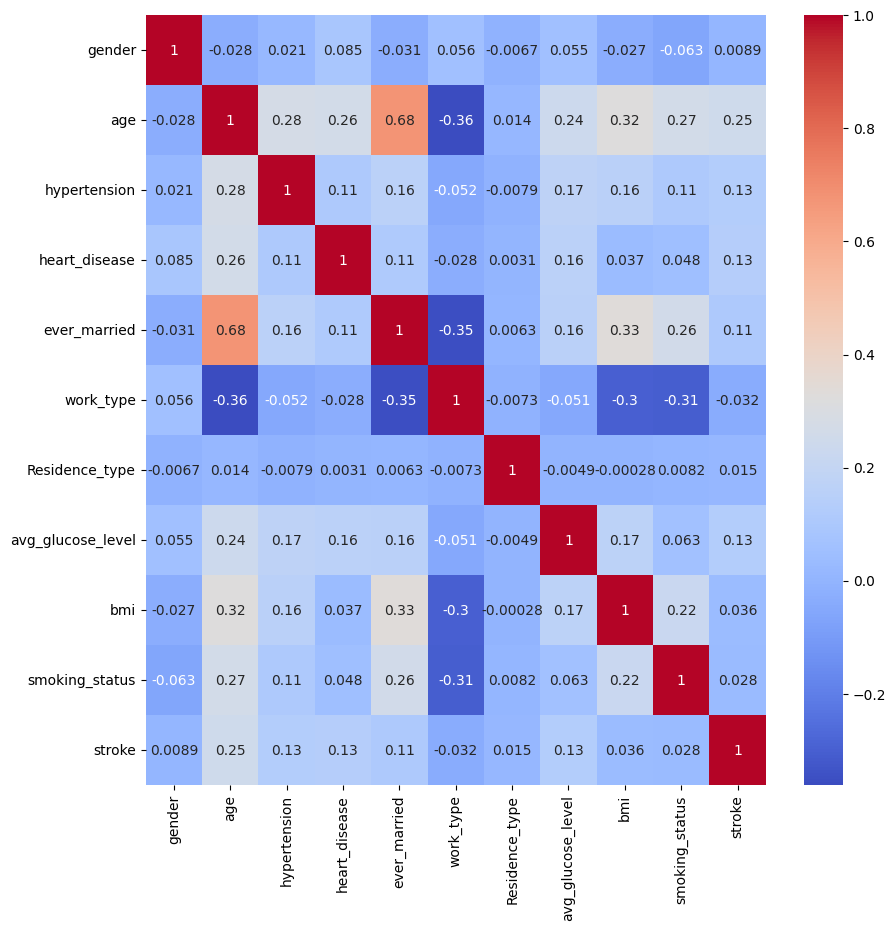

In [32]:
# Correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [33]:
# Step 4: Feature Scaling
# Separate features (X) and target (y)
X = data.drop(columns=['stroke'])  # Features (independent variables)
y = data['stroke']  # Target (dependent variable)
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [34]:
# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
X_smote[numerical_columns] = scaler.fit_transform(X_smote[numerical_columns])

In [35]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

print("\nTraining and Test Data Sizes:")
print(f"Training Data: {X_train.shape}, Test Data: {X_test.shape}")



Training and Test Data Sizes:
Training Data: (7777, 10), Test Data: (1945, 10)


In [36]:
# Model Training - Random Forest with GridSearchCV for Hyperparameter Tuning
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [37]:
# Save the best model
best_rf = grid_search_rf.best_estimator_
pickle.dump(best_rf, open('./rf_model.pkl', 'wb'))
pickle.dump(scaler, open('./scaler.pkl', 'wb'))

In [38]:
# Evaluate on Test Set
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy after tuning: {accuracy_rf * 100:.2f}%")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy after tuning: 94.86%
[[908  67]
 [ 33 937]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       975
           1       0.93      0.97      0.95       970

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



In [22]:
# Step 6: Model Training - Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Step 6: Model Training - Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

In [23]:
# Step 7: Model Evaluation
# Make predictions on the test data
y_pred = log_reg.predict(X_test)

In [24]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 93.93%


In [25]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[960   0]
 [ 62   0]]


In [26]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



e:\3rd Year 1st semi\Fdm\FDM_Project\Strock Prediction\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\3rd Year 1st semi\Fdm\FDM_Project\Strock Prediction\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\3rd Year 1st semi\Fdm\FDM_Project\Strock Prediction\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [27]:
# Step 8: Cross-Validation
cv_scores = cross_val_score(log_reg, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean() * 100:.2f}%")

Cross-Validation Scores: [0.95107632 0.95107632 0.95107632 0.95009785 0.95205479]
Mean Cross-Validation Score: 95.11%


In [28]:
# Step 9: Random Forest Classifier for Comparison
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Predictions with Random Forest
y_pred_rf = rf.predict(X_test)

In [30]:
# Accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Accuracy: {accuracy_rf * 100:.2f}%")


Random Forest Accuracy: 93.93%


In [31]:
# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix (Random Forest):")
print(conf_matrix_rf)


Confusion Matrix (Random Forest):
[[960   0]
 [ 62   0]]


In [32]:
# Classification Report for Random Forest
class_report_rf = classification_report(y_test, y_pred_rf)
print("\nClassification Report (Random Forest):")
print(class_report_rf)


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



e:\3rd Year 1st semi\Fdm\FDM_Project\Strock Prediction\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\3rd Year 1st semi\Fdm\FDM_Project\Strock Prediction\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\3rd Year 1st semi\Fdm\FDM_Project\Strock Prediction\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [33]:
# Step 10: Saving the Model
pickle.dump(rf, open('./rf_model.pkl', 'wb'))  # Save Random Forest model
print("\nRandom Forest model saved!")


Random Forest model saved!


In [34]:
# Step 11: Loading the Model
loaded_rf_model = pickle.load(open('./rf_model.pkl', 'rb'))
print("\nModel loaded successfully!")


Model loaded successfully!
